In [1]:
#Importng Libraries
import numpy as np 
import pandas as pd
import os 
import cv2
import matplotlib.pyplot as plt 
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D,Activation,BatchNormalization,Dropout
from tensorflow.python.keras import Sequential,backend,optimizers

In [2]:
parasitized='cell_images/Parasitized/'
uninfected='cell_images/Uninfected/'

In [3]:
parasitized_data = os.listdir(parasitized)
uninfected_data = os.listdir(uninfected)
data = []
labels = []

for img in parasitized_data:
    try:
        img_read = plt.imread(parasitized + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread(uninfected + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

image_data = np.array(data)
labels = np.array(labels)
print("image_data:",len(image_data))
print("labels:",len(labels))

image_data: 27558
labels: 27558


Data Visualization

Parasitized Sample:



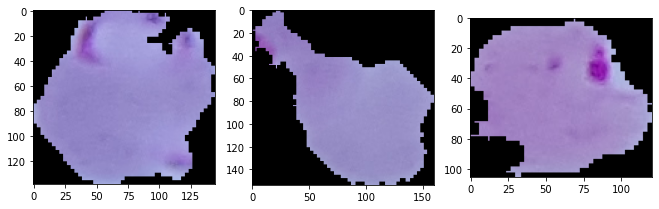

Uninfected Sample:



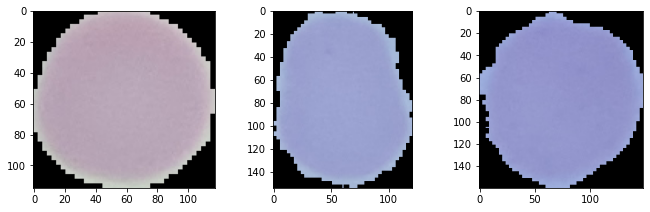

In [4]:
print("Parasitized Sample:\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread(parasitized+ parasitized_data[i])
    plt.imshow(img)
plt.show()

print("Uninfected Sample:\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread(uninfected+ uninfected_data[i])
    plt.imshow(img)
plt.show()


Dividng into train and test

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2,random_state = 0)

y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 22046
X_test: 5512
y_train: 22046
y_test: 5512


In [6]:
model = Sequential()
    
inputShape = (50, 50, 3)

if backend.image_data_format() == 'channels_first':
          inputShape = (3, 50, 50)
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten())
    
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        1

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
689/689 [==============================] - 46s 65ms/step - loss: 0.8040 - accuracy: 0.6711
Epoch 2/30
689/689 [==============================] - 49s 71ms/step - loss: 0.2426 - accuracy: 0.9062
Epoch 3/30
689/689 [==============================] - 49s 71ms/step - loss: 0.1864 - accuracy: 0.9340
Epoch 4/30
689/689 [==============================] - 50s 72ms/step - loss: 0.1756 - accuracy: 0.9411
Epoch 5/30
689/689 [==============================] - 49s 71ms/step - loss: 0.1674 - accuracy: 0.9445
Epoch 6/30
689/689 [==============================] - 49s 71ms/step - loss: 0.1705 - accuracy: 0.9409
Epoch 7/30
689/689 [==============================] - 47s 68ms/step - loss: 0.1604 - accuracy: 0.9460
Epoch 8/30
689/689 [==============================] - 42s 61ms/step - loss: 0.1585 - accuracy: 0.9477
Epoch 9/30
689/689 [==============================] - 42s 61ms/step - loss: 0.1525 - accuracy: 0.9500
Epoch 10/30
689/689 [==============================] - 42s 61ms/step - loss: 0.146

In [9]:
predict = model.evaluate(X_test, y_test)
print("Loss: ",predict[0])
print("Accuracy: ",predict[1]*100)

173/173 [==============================] - 2s 11ms/step - loss: 0.1189 - accuracy: 0.9586
Loss:  0.11889780312776566
Accuracy:  95.8635687828064
